### The following notebook is described to conduct a final sensitivity analysis and identify parameters that are most sensitive. The procedure followed is as such:
1. The csv files with the respective sensitivity indices are accessed.
2. The parameters are classified based on the materials (Peat, Mineral or Bedrock) and grouped into a single dataframe.
3. Then they are bar plotted for each depth to assess it's sensitivity. (We will have single plot - Each plot with 6 sub-figures and each figure with 11 parameters, and each parameter with three materials. 1 plot - 6 subfigures - 11 parameters - 3 materials)
4. Then we can determine the average RMSE value at all depths and plot it for temperature and moisture.
5. Ranking the parameters

- Note that here we will be considering all values to be positive. This will ensure that only the sensitivity is considered. i.e. mod |$\xi$|

In [1]:
%matplotlib inline
import sys,os
sys.path.append(os.path.join(os.environ['ATS_SRC_DIR'],'tools', 'utils'))
#sys.path.append(os.path.join('/home/rk/ats_rk/amanzi/src/physics/ats/tools/utils'))
import ats_xdmf
import plot_column_data
import colors
import numpy as np
import matplotlib.cm
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import h5py
import pandas as pd
from datetime import datetime
import matplotlib.image as mpimg

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import os
print(os.getcwd())

/home/rk/ats_rk/testing/ats-demos/rk_model/Case1_B_IV_SAfinal


#### 1. The csv files with the respective sensitivity indices are accessed:

In [4]:
# Importing the data

Param_type = ['Hyd_VGc','Phy','Therm']
Material = ['peat', 'mineral','bedrock']
Param_type_2 = ['Hyd','Phy','Therm']

for i in range(len(Param_type)):
    for j in range(len(Material)):
        #print(f'df_{Param_type_2[i]}_{Material[j]}')
        #print(f'../Case1_B_IV_{Param_type[i]}/Si_{Param_type_2[i]}_{Material[j]}.csv')
        locals()[f'si_{Param_type_2[i]}_{Material[j]}'] = pd.read_csv(f'../Case1_B_IV_{Param_type[i]}/Si_{Param_type_2[i]}_{Material[j]}.csv',index_col=0)

#df_test = pd.read_csv('../Case1_B_IV_Hyd_VGc/Si_Hyd_peat.csv',index_col=0)
#df_test

In [5]:
# Testing the dataframe
si_Therm_peat

tcs_temp  tcs_mois  tcd_temp  tcd_mois   af_temp   af_mois  auf_temp  \
0.04  6.043653 -0.538642 -0.164001  0.120430 -5.781783 -1.104809 -1.609868   
0.20 -0.148178 -7.483646 -0.410802 -0.461365 -5.296195 -2.467140  0.383835   
0.40 -0.062157 -2.314885 -0.418273 -0.239088 -5.066717 -2.332971  0.802069   
0.80  3.040173  2.619200 -0.258907  3.817751 -4.499944  0.136362  0.281843   
1.20  5.135519 -3.634628 -0.236296 -0.135017 -4.628654 -0.445407 -0.244664   
1.60  3.207901 -0.976573 -0.303853 -0.049845 -4.370013 -0.255729  0.193685   

       auf_mois  
0.04  -0.826496  
0.20   1.950588  
0.40   1.262047  
0.80 -15.985510  
1.20   1.172812  
1.60   0.324817

#### 2. The parameters are classified based on the materials (Peat, Mineral or Bedrock) and grouped into a single dataframe

In [6]:
# Creating a single dataframe that has all the properties
for i, value in enumerate(Material): 
    locals()[f'si_{value}'] = pd.concat([locals()[f'si_Hyd_{value}'], locals()[f'si_Phy_{value}'], locals()[f'si_Therm_{value}']], axis=1)
si_mineral

alpha_temp  alpha_mois     n_temp       n_mois   wr_temp    wr_mois  \
0.04    0.321926   11.091035   1.608517    15.481027 -0.060881  -6.575368   
0.20   -0.492767  -15.633559  22.433395  -154.910137 -2.575249   0.432439   
0.40   -0.813040    3.780141  33.235001  -102.019519 -3.515922 -22.229965   
0.80   -1.035989   16.057396  23.578943  -554.657100 -2.374714 -21.543792   
1.20   -0.100968    4.633036  30.413651 -1204.420826 -2.657449  82.603068   
1.60   -0.925151   12.535039  14.322165  -477.977039 -2.151908 -21.040309   

      por_temp   por_mois  porc_temp  porc_mois  ...  den_temp   den_mois  \
0.04       0.0   0.000000  -0.004107  -0.003447  ... -1.296025  -0.087578   
0.20       0.0   0.000000  -0.012168  -0.007623  ... -3.308851   2.108807   
0.40       0.0 -23.886040  -0.015353  -0.004202  ... -3.696873   1.834846   
0.80       0.0 -62.605668  -0.012274  -0.024601  ... -4.100647  12.747405   
1.20       0.0 -53.780629  -0.012638  -0.002235  ... -7.432402   2.569209   
1.60       0.0 -38.134760  -0.012345  -0.001227  ... -3.833249   0.988008   

       tcs_temp   tcs_mois  tcd_temp  tcd_mois   af_temp   af_mois  auf_temp  \
0.04  -4.534363   1.948650  0.214224  0.023797 -5.357722 -1.272606  0.796014   
0.20   2.143334  -4.489810 -0.644055 -0.332184 -6.577407 -2.606643 -1.623172   
0.40   3.048492  -0.006474 -1.249884 -0.335909 -7.186522 -2.854358 -3.261891   
0.80   8.660171  25.937721 -1.365098  4.243447 -6.431048 -2.257627 -4.660812   
1.20  21.390983 -15.455045 -1.766441  0.230344 -6.888756  0.692509 -6.431965   
1.60  21.949888  -6.559722 -1.937338  0.164357 -6.366867  0.244735 -7.320536   

      auf_mois  
0.04 -0.029962  
0.20 -0.799245  
0.40 -1.315721  
0.80 -2.109094  
1.20  0.804194  
1.60  0.507582  

[6 rows x 22 columns]

In [7]:
# Seperating the dataframe based on temperature and moisture
for i, value in enumerate(Material):
    locals()[f'si_{value}_temp'] =  locals()[f'si_{value}'].filter(regex='_temp')
    locals()[f'si_{value}_mois'] =  locals()[f'si_{value}'].filter(regex='_mois')


In [8]:
si_mineral_temp

alpha_temp     n_temp   wr_temp  por_temp  porc_temp  perm_temp  \
0.04    0.321926   1.608517 -0.060881       0.0  -0.004107   0.034923   
0.20   -0.492767  22.433395 -2.575249       0.0  -0.012168   0.105360   
0.40   -0.813040  33.235001 -3.515922       0.0  -0.015353   0.126872   
0.80   -1.035989  23.578943 -2.374714       0.0  -0.012274   0.093502   
1.20   -0.100968  30.413651 -2.657449       0.0  -0.012638   0.099320   
1.60   -0.925151  14.322165 -2.151908       0.0  -0.012345   0.087170   

      den_temp   tcs_temp  tcd_temp   af_temp  auf_temp  
0.04 -1.296025  -4.534363  0.214224 -5.357722  0.796014  
0.20 -3.308851   2.143334 -0.644055 -6.577407 -1.623172  
0.40 -3.696873   3.048492 -1.249884 -7.186522 -3.261891  
0.80 -4.100647   8.660171 -1.365098 -6.431048 -4.660812  
1.20 -7.432402  21.390983 -1.766441 -6.888756 -6.431965  
1.60 -3.833249  21.949888 -1.937338 -6.366867 -7.320536

In [9]:
si_bedrock_mois

alpha_mois    n_mois   wr_mois  por_mois     porc_mois     perm_mois  \
0.04   -0.014932  0.012695  0.007266  0.011307  6.152340e-07  8.717071e-10   
0.20   -0.068139 -0.013889 -0.007376  0.035722 -6.075591e-05 -3.881666e-09   
0.40    0.002080  0.022146 -0.002503 -0.050962 -3.923339e-05 -2.317913e-09   
0.80   -0.001718 -0.619337  0.087053  1.343203  5.470843e-05 -1.995048e-08   
1.20   -0.002497 -0.218298  0.037417  0.455076  1.985280e-05 -2.924159e-09   
1.60   -0.003592 -0.646180  0.078357  0.454924  4.108568e-05 -1.747656e-09   

      den_mois  tcs_mois  tcd_mois   af_mois  auf_mois  
0.04 -0.050211  0.007662  0.002686  0.007279  0.021834  
0.20 -0.585504  0.071855 -0.024781 -0.061832  0.059326  
0.40  0.052100  0.001792 -0.057017 -0.002544  0.067928  
0.80  1.730796 -8.599553  0.623894  0.222212  1.401374  
1.20  0.579115  1.904899 -0.125494 -0.054264 -0.286734  
1.60  0.554704  1.481127 -0.093157 -0.044875 -0.226802

#### 3. Bar plotting the parameters based on it's sensitivity

<BarContainer object of 11 artists>

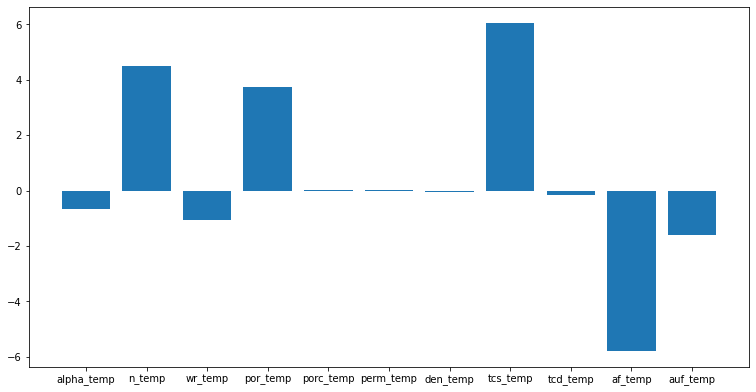

In [10]:
# Example
# https://www.tutorialspoint.com/matplotlib/matplotlib_bar_plot.htm
fig = plt.figure()
fig.set_size_inches(10,5)
ax = fig.add_axes([0,0,1,1])
ax.bar(si_peat_temp.columns, si_peat_temp.iloc[0,:])

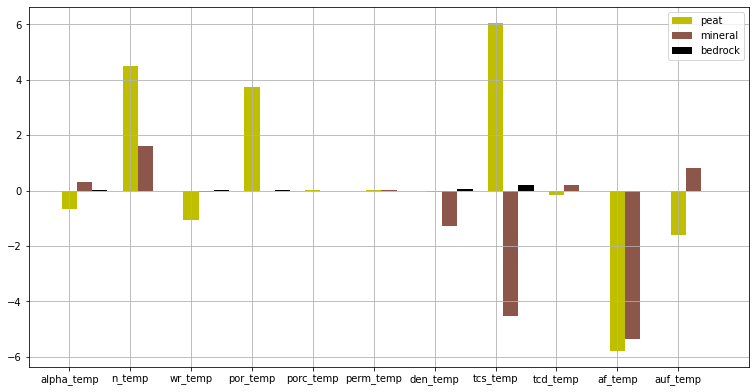

In [11]:
# Example
# https://www.tutorialspoint.com/matplotlib/matplotlib_bar_plot.htm
fig = plt.figure()
fig.set_size_inches(10,5)
ax = fig.add_axes([0,0,1,1])
X = np.arange(11)
ax.bar(X + 0.00, si_peat_temp.iloc[0,:], color='y', label='peat', width=0.25)
ax.bar(X + 0.25, si_mineral_temp.iloc[0,:],color='tab:brown', label='mineral', width=0.25)
ax.bar(X + 0.5, si_bedrock_temp.iloc[0,:], color='k', label='bedrock', width=0.25)
major_ticks = np.arange(0, 11, 1)
ax.set_xticks(major_ticks)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels = si_peat_temp.columns 
ax.set_xticklabels(labels)
ax.legend()
ax.grid()

Text(0, 0.5, 'SI')

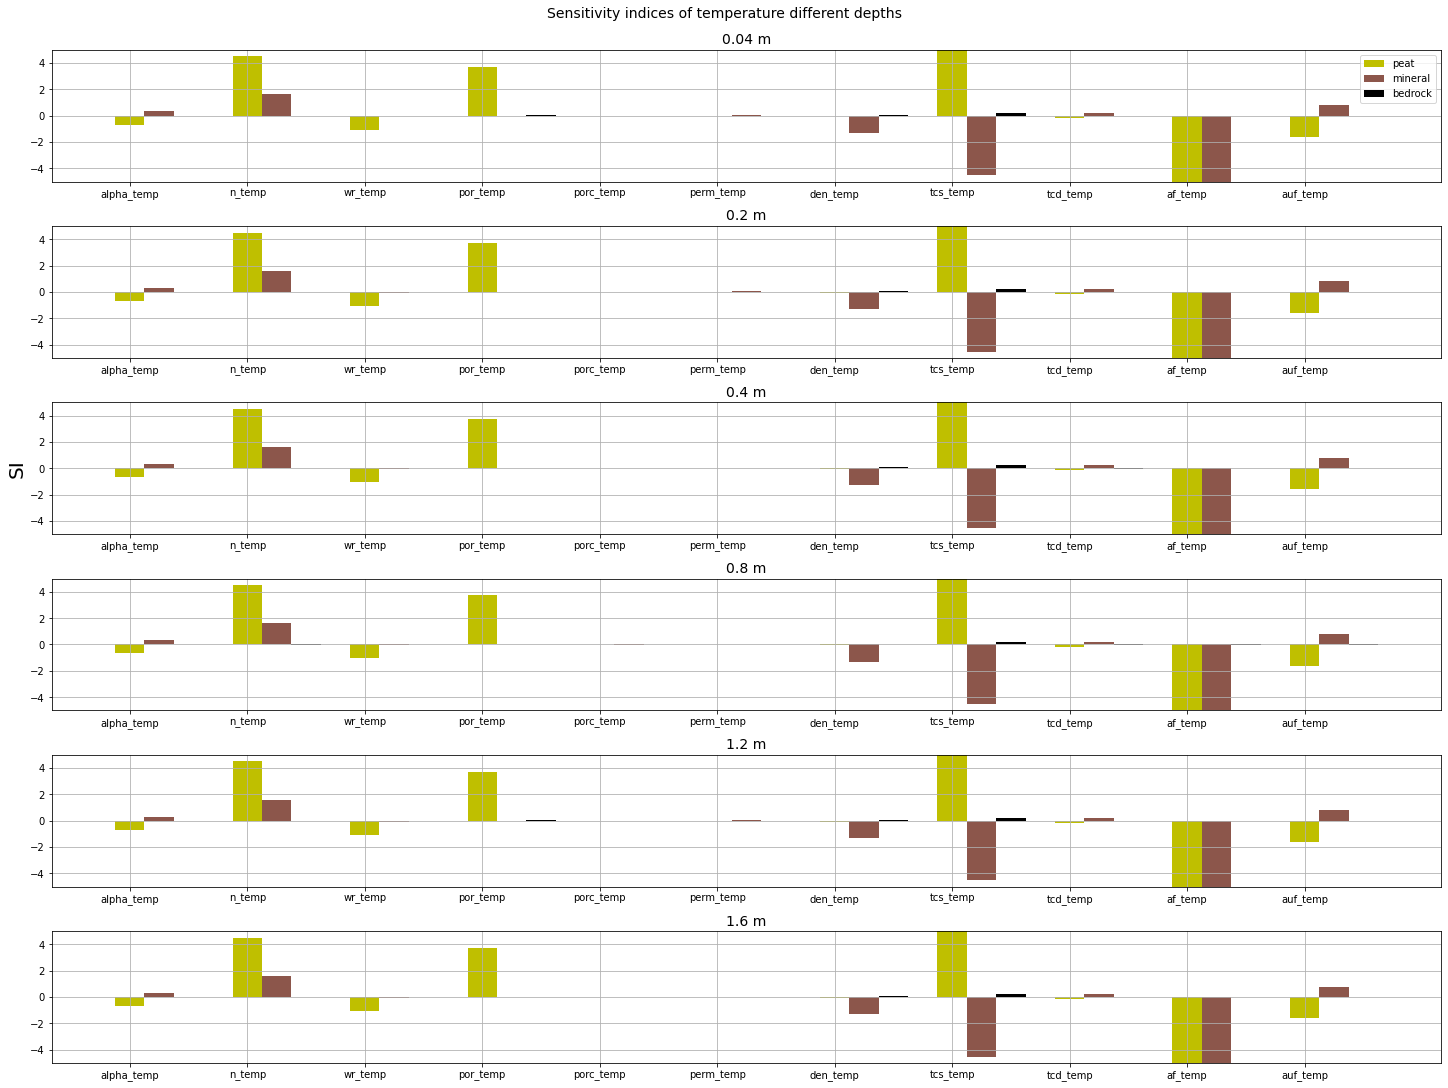

In [12]:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

fig2.suptitle('Sensitivity indices of temperature different depths', fontsize=14)


depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

X = np.arange(11)

for j, depth in enumerate(depths):
        locals()['f2_ax'+str(j+1)].bar(X + 0.00, si_peat_temp.iloc[0,:], color='y', label='peat', width=0.25)
        locals()['f2_ax'+str(j+1)].bar(X + 0.25, si_mineral_temp.iloc[0,:],color='tab:brown', label='mineral', width=0.25)
        locals()['f2_ax'+str(j+1)].bar(X + 0.5, si_bedrock_temp.iloc[0,:], color='k', label='bedrock', width=0.25)
        locals()['f2_ax'+str(j+1)].set_title(f'{depth} m', fontsize=14)
        major_ticks = np.arange(0, 11, 1)
        locals()['f2_ax'+str(j+1)].set_xticks(major_ticks)
        labels = [item.get_text() for item in ax.get_xticklabels()]
        labels = si_peat_temp.columns 
        locals()['f2_ax'+str(j+1)].set_xticklabels(labels)
        locals()['f2_ax'+str(j+1)].grid()
        locals()['f2_ax'+str(j+1)].set_ylim(-5,5)
    
f2_ax1.legend()
f2_ax3.set_ylabel('SI', fontsize=20)


Text(0, 0.5, 'SI')

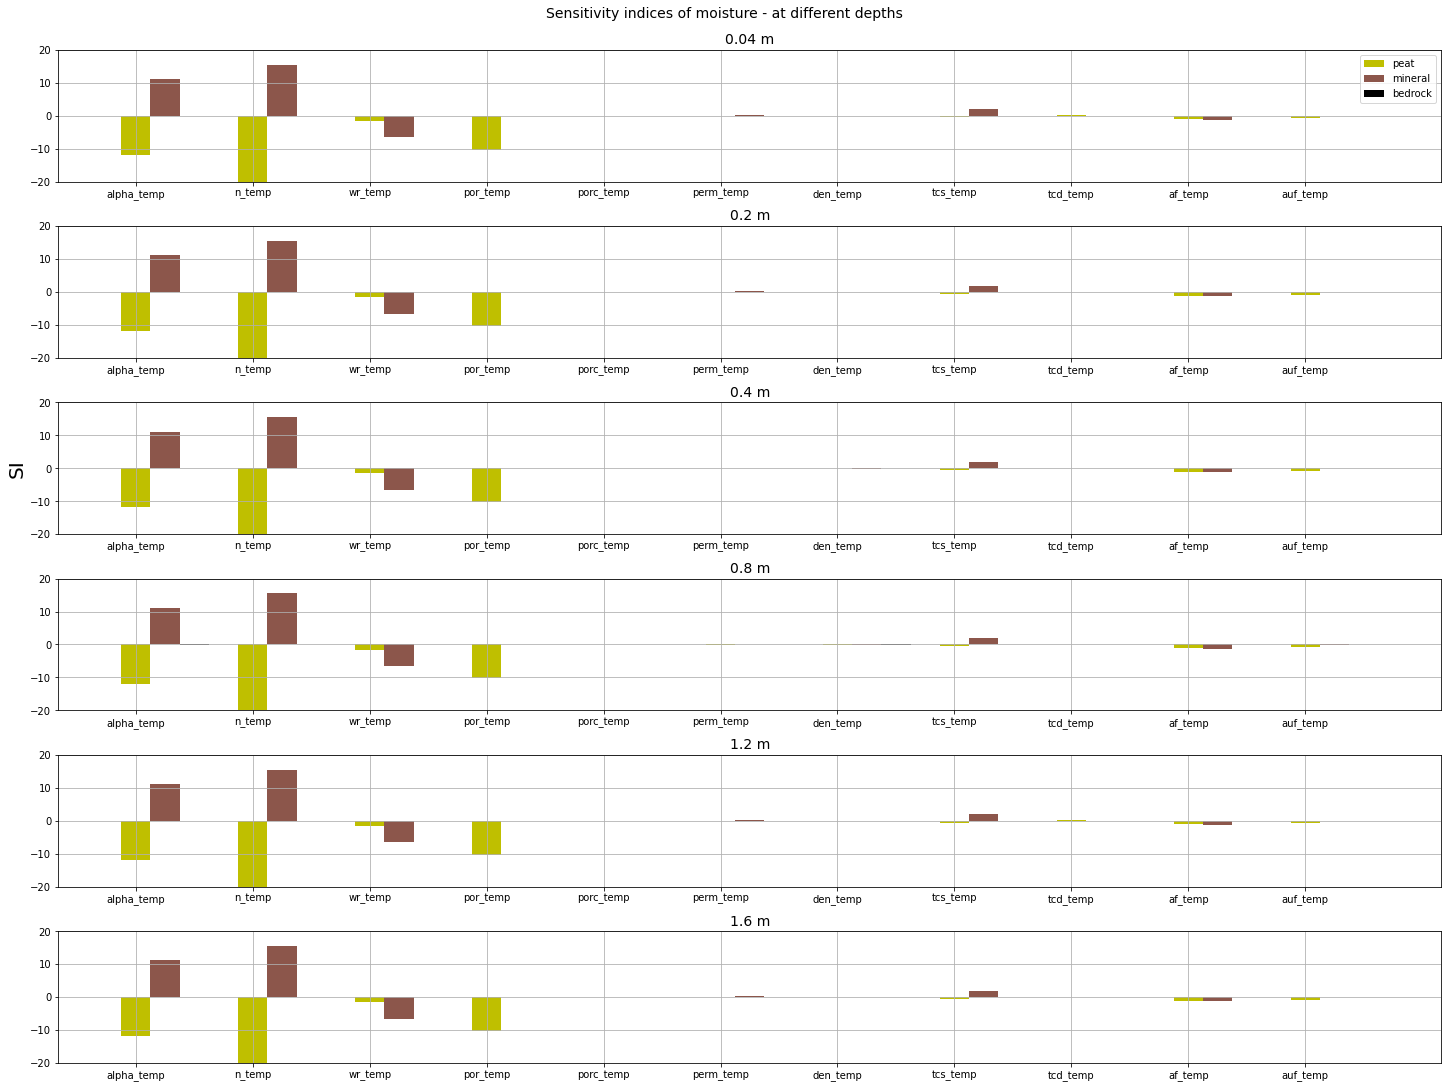

In [13]:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

fig2.suptitle('Sensitivity indices of moisture - at different depths', fontsize=14)


depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

X = np.arange(11)

for j, depth in enumerate(depths):
        locals()['f2_ax'+str(j+1)].bar(X + 0.00, si_peat_mois.iloc[0,:], color='y', label='peat', width=0.25)
        locals()['f2_ax'+str(j+1)].bar(X + 0.25, si_mineral_mois.iloc[0,:],color='tab:brown', label='mineral', width=0.25)
        locals()['f2_ax'+str(j+1)].bar(X + 0.5, si_bedrock_mois.iloc[0,:], color='k', label='bedrock', width=0.25)
        locals()['f2_ax'+str(j+1)].set_title(f'{depth} m', fontsize=14)
        major_ticks = np.arange(0, 11, 1)
        locals()['f2_ax'+str(j+1)].set_xticks(major_ticks)
        labels = [item.get_text() for item in ax.get_xticklabels()]
        labels = si_peat_temp.columns 
        locals()['f2_ax'+str(j+1)].set_xticklabels(labels)
        locals()['f2_ax'+str(j+1)].grid()
        locals()['f2_ax'+str(j+1)].set_ylim(-20,20)
    
f2_ax1.legend()
f2_ax3.set_ylabel('SI', fontsize=20)

### 4. Determining an average for all depths and plotting temperature and moisture - 

In [14]:
si_Hyd_peat

alpha_temp  alpha_mois    n_temp      n_mois   wr_temp   wr_mois
0.04   -0.676500  -11.885004  4.505533 -357.162000 -1.053239 -1.597255
0.20   -0.265075   -0.050334  5.264252    8.294652 -0.707469 -3.126900
0.40   -0.289507   -0.260745  3.548751    3.874702 -0.444137 -1.692121
0.80   -0.359704    0.073045  2.411483    2.645340 -0.386009  0.057785
1.20   -0.412627    0.023525  2.501762    0.678555 -0.416164  0.036117
1.60   -0.304242   -0.007214  2.470180    0.543078 -0.268549  0.000228

In [15]:
# Finding the average

for i, material in enumerate(Material):
    locals()[f'si_{material}_temp_avg'] = locals()[f'si_{material}_temp'].mean(axis=0)
    locals()[f'si_{material}_mois_avg'] = locals()[f'si_{material}_mois'].mean(axis=0)

Text(0, 0.5, 'Sensitivity index')

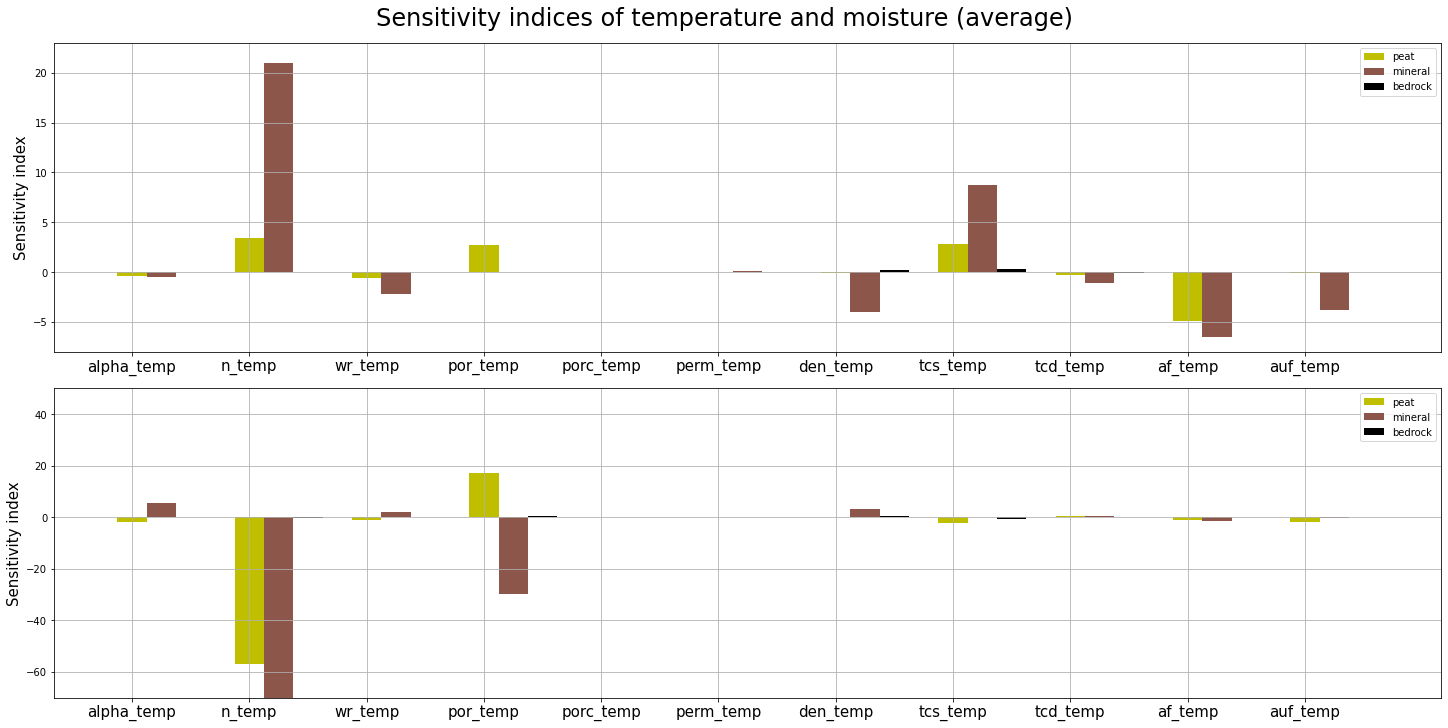

In [16]:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(20,10), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=2, height_ratios=[1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])


fig2.suptitle('Sensitivity indices of temperature and moisture (average)', fontsize=24)


X = np.arange(11)
major_ticks = np.arange(0, 11, 1)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels = si_peat_temp.columns 

# Plotting temperature - SI
f2_ax1.bar(X + 0.00, si_peat_temp_avg, color='y', label='peat', width=0.25)
f2_ax1.bar(X + 0.25, si_mineral_temp_avg, color='tab:brown', label='mineral', width=0.25)
f2_ax1.bar(X + 0.50, si_bedrock_temp_avg, color='k', label='bedrock', width=0.25)
f2_ax1.set_xticks(major_ticks)
f2_ax1.set_xticklabels(labels, fontsize=15)
f2_ax1.grid()
f2_ax1.set_ylim(-8, 23)
f2_ax1.legend()
f2_ax1.set_ylabel('Sensitivity index', fontsize=15)

# Plotting moisture - SI
f2_ax2.bar(X + 0.00, si_peat_mois_avg, color='y', label='peat', width=0.25)
f2_ax2.bar(X + 0.25, si_mineral_mois_avg, color='tab:brown', label='mineral', width=0.25)
f2_ax2.bar(X + 0.50, si_bedrock_mois_avg, color='k', label='bedrock', width=0.25)
f2_ax2.set_xticks(major_ticks)
f2_ax2.set_xticklabels(labels, fontsize=15)
f2_ax2.grid()
f2_ax2.set_ylim(-70, 50)
f2_ax2.legend()
f2_ax2.set_ylabel('Sensitivity index', fontsize=15)

### 5. Ranking the parameters

In [17]:
df_ex = si_peat_temp_avg.copy()
df_ex.index = ['alpha_temp_p', 'n_temp_p', 'wr_temp_p', 'por_temp_p', 'porc_temp_p', 'perm_temp_p','den_temp_p', 'tcs_temp_p', 'tcd_temp_p', 'af_temp_p', 'auf_temp_p']
df_ex

alpha_temp_p   -0.384609
n_temp_p        3.450327
wr_temp_p      -0.545928
por_temp_p      2.717162
porc_temp_p     0.005500
perm_temp_p     0.013714
den_temp_p     -0.085517
tcs_temp_p      2.869485
tcd_temp_p     -0.298689
af_temp_p      -4.940551
auf_temp_p     -0.032183
dtype: float64

In [18]:
### Adding all the average variables in one dataframe 

# Combining the dataframes - Temperature
frames = [si_peat_temp_avg, si_mineral_temp_avg, si_bedrock_temp_avg ]
si_temp_avg = pd.concat(frames)

# Renaming the column names
si_temp_avg.index = ['alpha_p', 'n_p', 'wr_p', 'por_p', 'porc_p', 'perm_p',
       'den_p', 'tcs_p', 'tcd_p', 'af_p', 'auf_p', 'alpha_m',
       'n_m', 'wr_m', 'por_m', 'porc_m', 'perm_m', 'den_m',
       'tcs_m', 'tcd_m', 'af_m', 'auf_m', 'alpha_b', 'n_b',
       'wr_b', 'por_b', 'porc_b', 'perm_b', 'den_b', 'tcs_b',
       'tcd_b', 'af_b', 'auf_b']

# Getting the absolute value (It will be easier to rank)
si_temp_avg_mod = abs(si_temp_avg)
#si_temp_avg_mod.sort_values(ascending=False)

# Data series to frames and naming the column
si_temp_avg_mod = si_temp_avg_mod.to_frame()
si_temp_avg_mod.columns = ['si_avg']

# Changing the datatype
si_temp_avg_mod = si_temp_avg_mod.astype('float64')


# Dividing all the values with the maximum
si_temp_avg_mod['rescaled_value'] =   si_temp_avg_mod['si_avg']/si_temp_avg_mod['si_avg'].max()

In [19]:
# Combining the dataframes - Moisture
frames = [si_peat_mois_avg, si_mineral_mois_avg, si_bedrock_mois_avg ]
si_mois_avg = pd.concat(frames)

# Renaming the column names
si_mois_avg.index = ['alpha_p', 'n_p', 'wr_p', 'por_p', 'porc_p', 'perm_p',
       'den_p', 'tcs_p', 'tcd_p', 'af_p', 'auf_p', 'alpha_m',
       'n_m', 'wr_m', 'por_m', 'porc_m', 'perm_m', 'den_m',
       'tcs_m', 'tcd_m', 'af_m', 'auf_m', 'alpha_b', 'n_b',
       'wr_b', 'por_b', 'porc_b', 'perm_b', 'den_b', 'tcs_b',
       'tcd_b', 'af_b', 'auf_b']

# Getting the absolute value (It will be easier to rank)
si_mois_avg_mod = abs(si_mois_avg)
#si_mois_avg_mod.sort_values(ascending=False)

# Data series to frames and naming the column
si_mois_avg_mod = si_mois_avg_mod.to_frame()
si_mois_avg_mod.columns = ['si_avg']

# Changing the datatype
si_mois_avg_mod = si_mois_avg_mod.astype('float64')


# Dividing all the values with the maximum
si_mois_avg_mod['rescaled_value'] =   si_mois_avg_mod['si_avg']/si_mois_avg_mod['si_avg'].max()

In [20]:
si_temp_avg_mod_sort = si_temp_avg_mod['rescaled_value'].sort_values(ascending=False)
si_mois_avg_mod_sort = si_mois_avg_mod['rescaled_value'].sort_values(ascending=False)

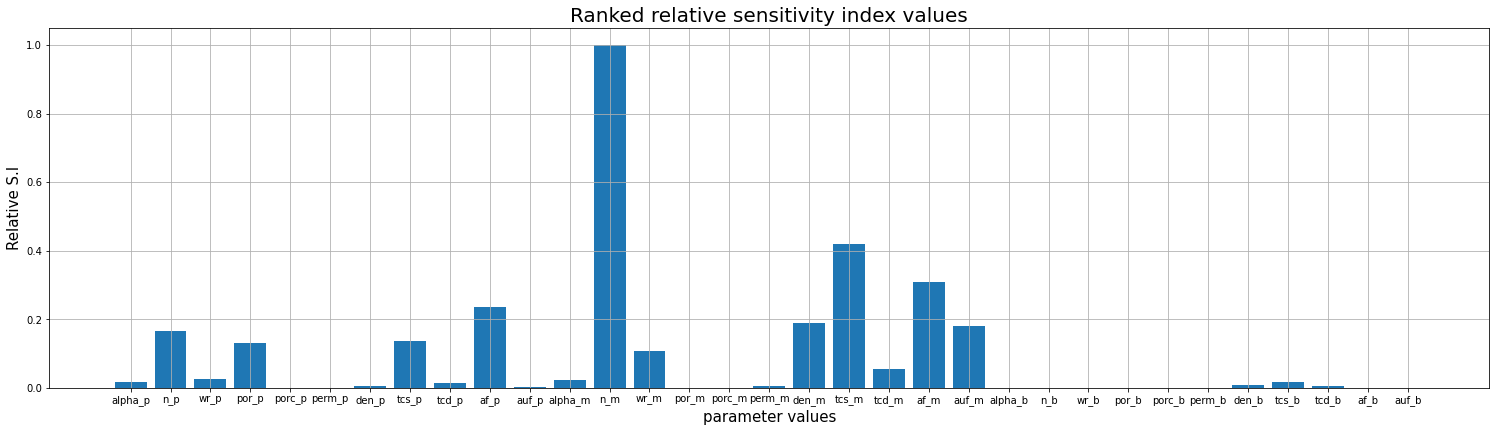

In [21]:
# Example
# https://www.tutorialspoint.com/matplotlib/matplotlib_bar_plot.htm
fig = plt.figure()
fig.set_size_inches(20,5)
ax = fig.add_axes([0,0,1,1])
ax.set_title('Ranked relative sensitivity index values', fontsize=20)
ax.bar(si_temp_avg_mod['rescaled_value'].index, si_temp_avg_mod['rescaled_value'])
ax.set_xlabel('parameter values', fontsize=15)
ax.set_ylabel('Relative S.I', fontsize=15)
ax.grid(True)

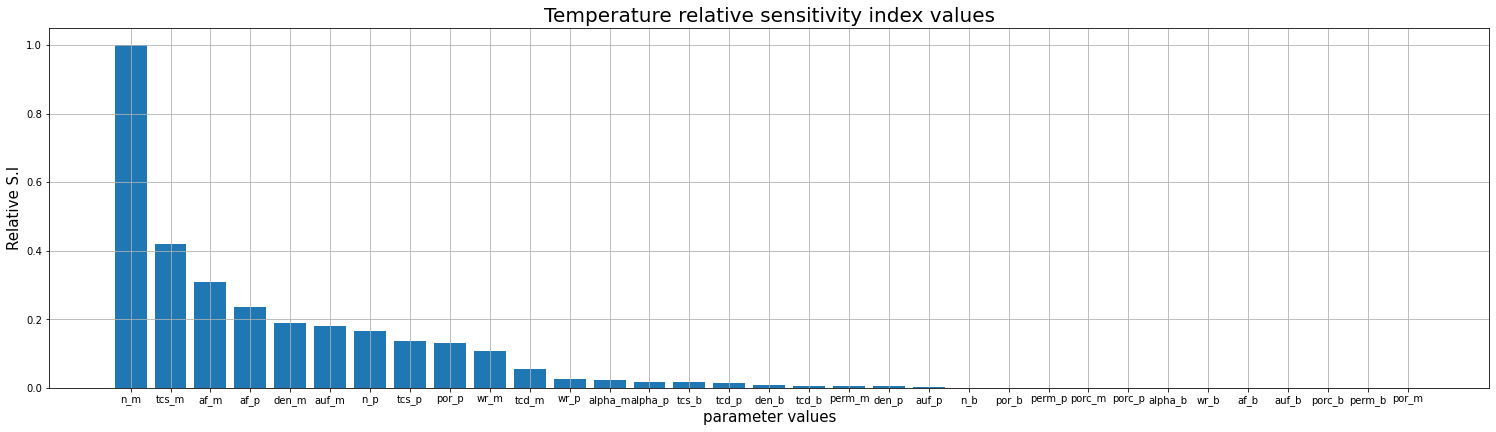

In [22]:
# Example
# https://www.tutorialspoint.com/matplotlib/matplotlib_bar_plot.htm
fig = plt.figure()
fig.set_size_inches(20,5)
ax = fig.add_axes([0,0,1,1])
ax.set_title('Temperature relative sensitivity index values', fontsize=20)
ax.bar(si_temp_avg_mod_sort.index, si_temp_avg_mod_sort.values)
ax.set_xlabel('parameter values', fontsize=15)
ax.set_ylabel('Relative S.I', fontsize=15)
ax.grid(True)

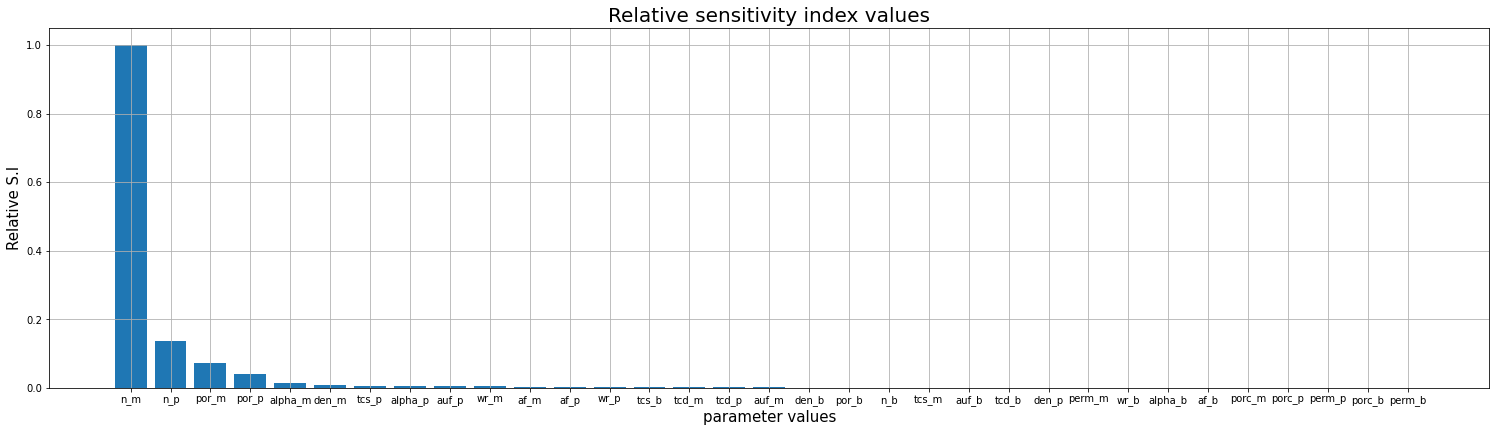

In [23]:
# Example
# https://www.tutorialspoint.com/matplotlib/matplotlib_bar_plot.htm
fig = plt.figure()
fig.set_size_inches(20,5)
ax = fig.add_axes([0,0,1,1])
ax.set_title('Relative sensitivity index values', fontsize=20)
ax.bar(si_mois_avg_mod_sort.index, si_mois_avg_mod_sort.values)
ax.set_xlabel('parameter values', fontsize=15)
ax.set_ylabel('Relative S.I', fontsize=15)
ax.grid(True)

#### The most sensitive parameters:
- All values with a relative sensitivity above 0.1 is considered for the analysis with PEST. We need to consider this for both temperature and moisture.



In [26]:
si_temp_avg_mod_sort.

In [37]:
si_temp_final_0_1 = si_temp_avg_mod_sort[si_temp_avg_mod_sort.values > 0.1].index
si_temp_final_0_1

Index(['n_m', 'tcs_m', 'af_m', 'af_p', 'den_m', 'auf_m', 'n_p', 'tcs_p',
       'por_p', 'wr_m'],
      dtype='object')

In [39]:
si_mois_final_0_1 = si_mois_avg_mod_sort[si_mois_avg_mod_sort.values > 0.1].index
si_mois_final_0_1

Index(['n_m', 'n_p'], dtype='object')

In [40]:
si_temp_final_0_1

Index(['n_m', 'tcs_m', 'af_m', 'af_p', 'den_m', 'auf_m', 'n_p', 'tcs_p',
       'por_p', 'wr_m'],
      dtype='object')

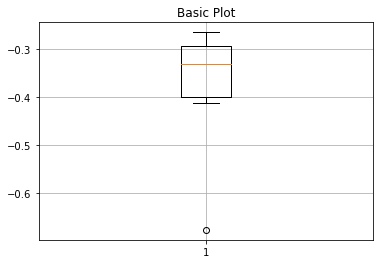

In [23]:
### Example for a boxplot
# Fixing random state for reproducibility
# -Source: https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(si_peat_temp.iloc[:,0])
ax1.grid(True)

In [24]:
si_peat_temp.iloc[:,0].sort_values(ascending=False)

0.20   -0.265075
0.40   -0.289507
1.60   -0.304242
0.80   -0.359704
1.20   -0.412627
0.04   -0.676500
Name: alpha_temp, dtype: float64